### Import packages and set config

In [1]:
import pandas as pd

from tqdm.asyncio import tqdm

# For clustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from plots.plt_scatterplot import scatterplot
from plots.plt_silhouette_elbow  import elbowplot, silhouetteplot
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from clusteval import clusteval
from mpl_toolkits.mplot3d import Axes3D

## Clustering analysis

In [2]:
embedding_df = pd.read_csv('/hadatasets/fillipe.silva/LLMSegm/data/yelp/gpt2-medium_25_test_embeddings.csv')

### Determining The Optimal Number Of Clusters

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Generate synthetic data
X = embedding_df

# Range of K to try
K_range = range(2, 10)

# Storage for metric scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(K_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.subplot(1, 3, 3)
plt.plot(K_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

In [6]:
ce = clusteval(evaluate='silhouette',
               cluster='kmeans',
               min_clust=2,
               verbose='info')
results = ce.fit(embedding_df)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [09:21<00:00, 24.40s/it]
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


In [6]:
OPTIMAL_CLUSTERS = 2
N_INIT = 10
MAX_ITER = 100

### Plotting Silhouette Score

[clusteval] >INFO> Retrieving input data set.


[clusteval] >INFO> Compute t-SNE embedding.
[clusteval] >INFO> Estimated number of n_clusters: 1, average silhouette_score=0.369
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera San

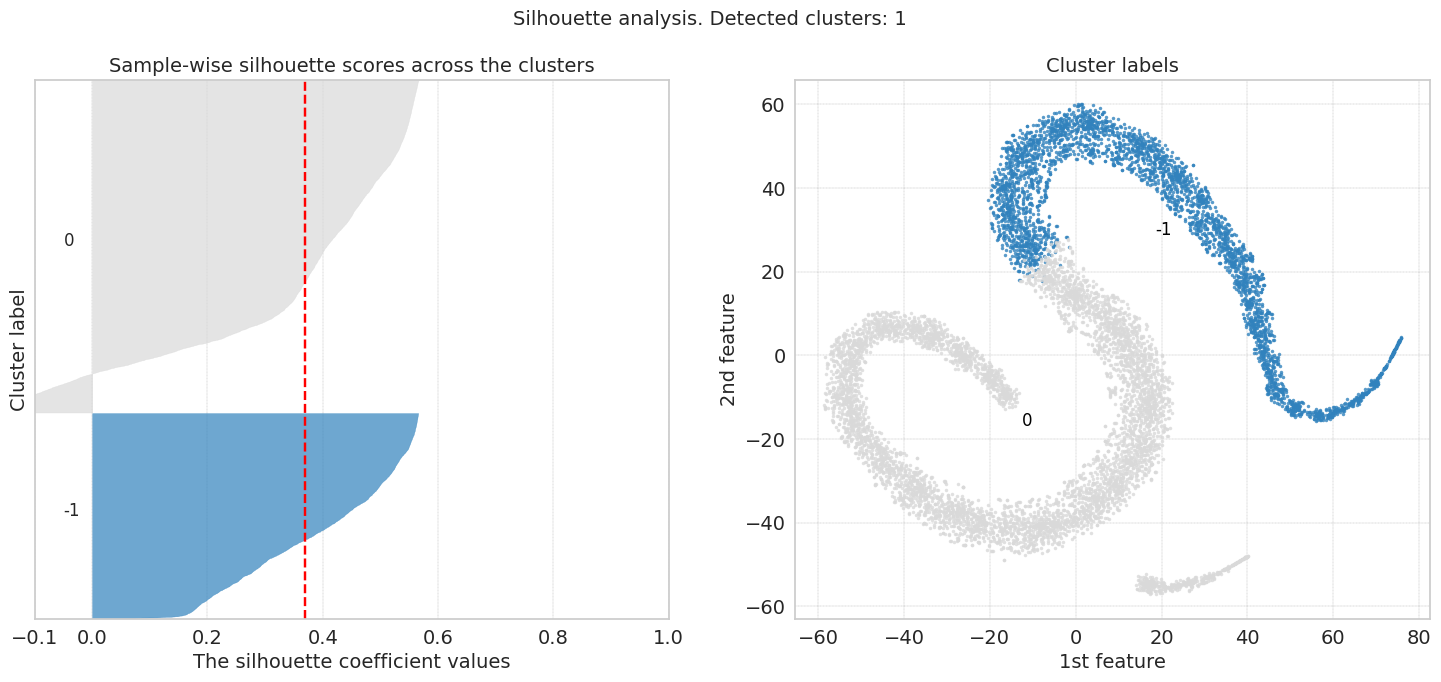

(<Figure size 1800x700 with 2 Axes>,
 <Axes: title={'center': 'Sample-wise silhouette scores across the clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <Axes: title={'center': 'Cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [8]:
ce.plot_silhouette(embedding='tsne')

### Detect the Driving Features Behind the Cluster Labels.

[clusteval] >ERROR> The Library [hnet] is not installed by default. Try: <pip install hnet>
[clusteval] >INFO> Retrieving input data set.


[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

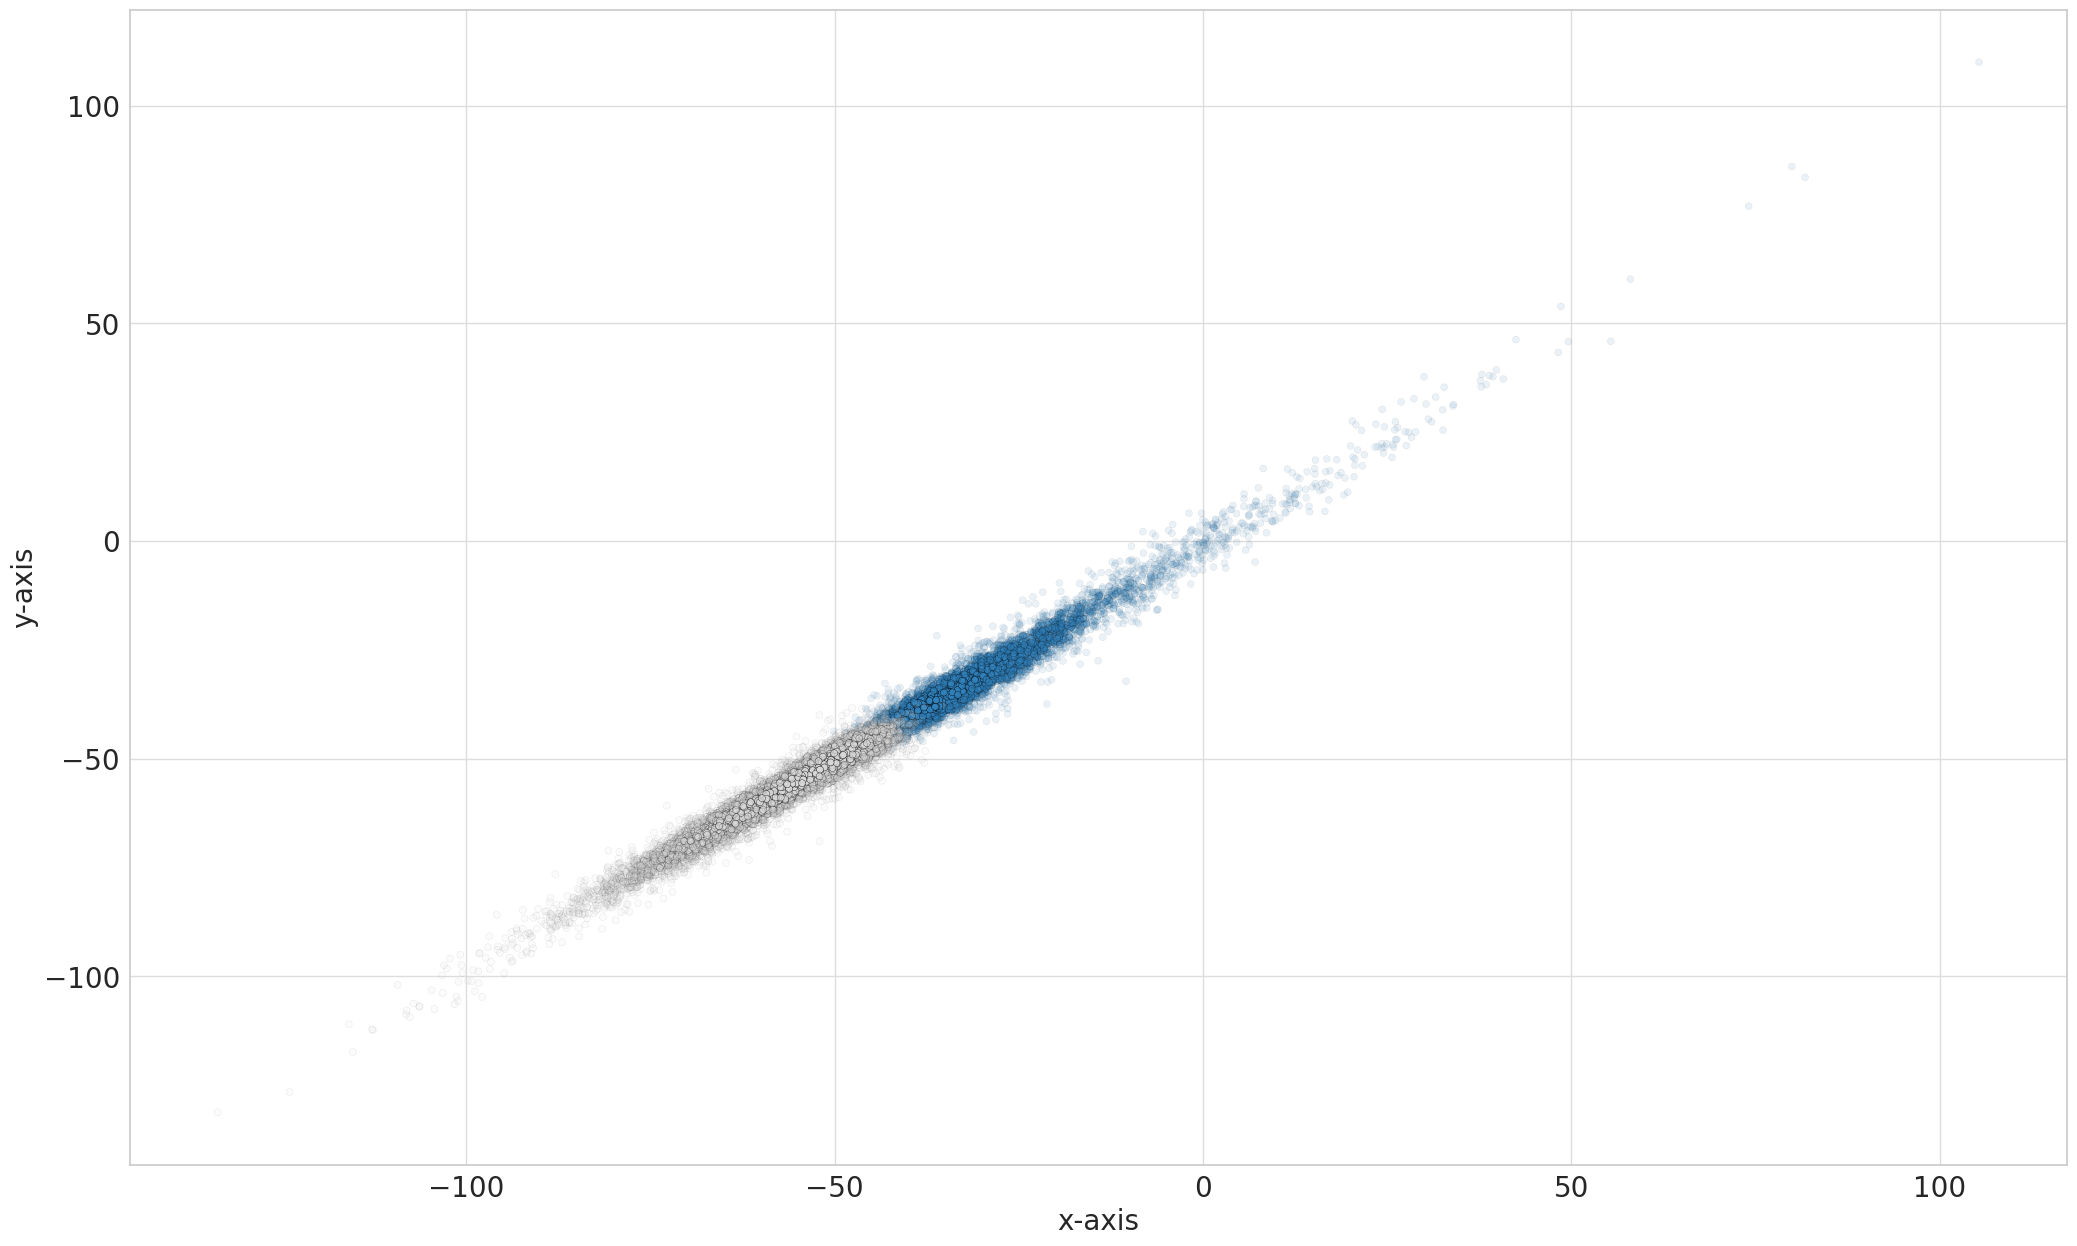

In [9]:
enrichment_results = ce.enrichment(embedding_df)
ce.scatter(n_feat=3)

### Plotting Elbowplot

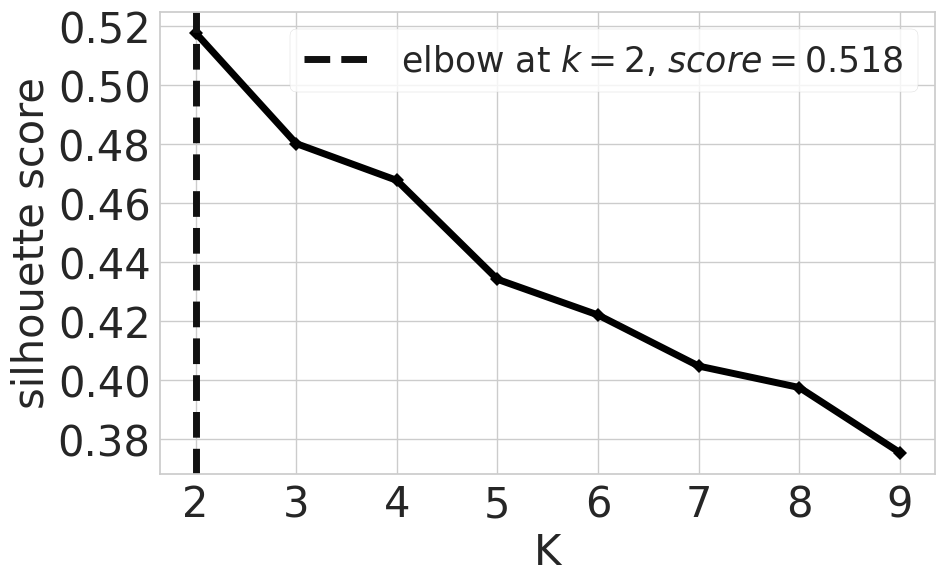

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
elbowplot(embedding_df,  KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER))

### Plotting Silhouette

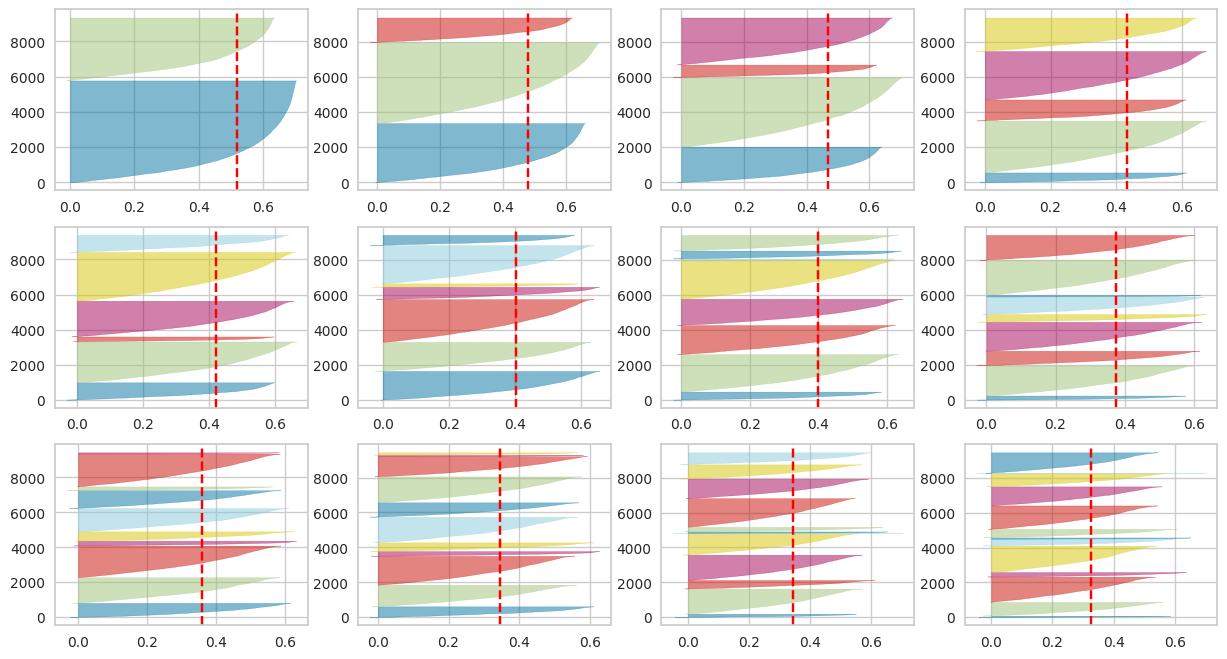

In [11]:
silhouetteplot(embedding_df)

### TSN-e Visualization

In [12]:
tsne = TSNE(n_components=3, verbose=1, perplexity=200, n_iter=5000, learning_rate=200)
X_3d = tsne.fit_transform(embedding_df)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 9336 samples in 3.522s...
[t-SNE] Computed neighbors for 9336 samples in 10.748s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9336
[t-SNE] Computed conditional probabilities for sample 2000 / 9336
[t-SNE] Computed conditional probabilities for sample 3000 / 9336
[t-SNE] Computed conditional probabilities for sample 4000 / 9336
[t-SNE] Computed conditional probabilities for sample 5000 / 9336
[t-SNE] Computed conditional probabilities for sample 6000 / 9336
[t-SNE] Computed conditional probabilities for sample 7000 / 9336
[t-SNE] Computed conditional probabilities for sample 8000 / 9336
[t-SNE] Computed conditional probabilities for sample 9000 / 9336
[t-SNE] Computed conditional probabilities for sample 9336 / 9336
[t-SNE] Mean sigma: 274.406548
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.635311
[t-SNE] KL divergence after 5000 iterations: 0.489054


In [14]:
km = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
km.fit(X_3d)

KMeans(max_iter=100, n_clusters=2, n_init=10)

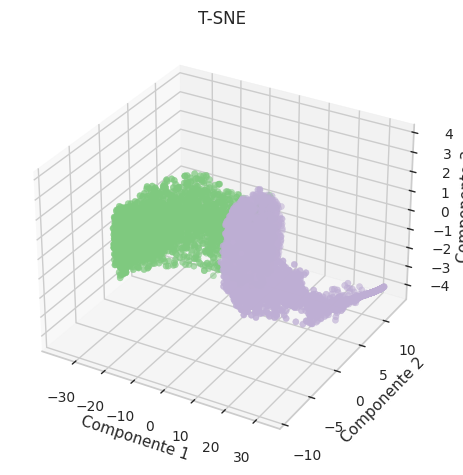

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=plt.cm.Accent(km.labels_), s=20)

ax.set_title('T-SNE')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.show()

# Reducing ...

In [3]:
import umap.umap_ as umap
import numpy as np

reducer = umap.UMAP(n_neighbors=200, n_components=200, metric="cosine", random_state=42)

# Redução de dimensionalidade
data_umap = reducer.fit_transform(embedding_df)

/home/fillipe.silva/miniconda3/envs/llmsegm/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### Davies Bouldin Score

In [7]:
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=1000).fit(data_umap)
ylabel = kmeans.labels_
dbi = davies_bouldin_score(data_umap, ylabel)
print("Davies-Bouldin Index: ", dbi)

Davies-Bouldin Index:  0.08916480208436196


### Calinski Harabasz Score

In [8]:
# Quanto maior o valor, melhor a qualidade do agrupamento.
# Esse score mede a dispersão entre os clusters comparada com a dispersão dentro dos clusters. 
#Valores mais altos indicam que os clusters estão mais densos e melhor separados uns dos outros, o que geralmente é um sinal de um agrupamento mais eficaz.

#Assim, um valor alto do score de Calinski-Harabasz sugere que os clusters são internamente homogêneos e externamente bem diferenciados,
#enquanto valores baixos podem indicar sobreposição entre os clusters ou que os clusters internamente são muito dispersos.

kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(data_umap)
calinski_harabasz_score(data_umap, kmeans.labels_)

20770.163656146236

### Silhouette Score

In [9]:
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
silhouette_score(data_umap, kmeans.fit_predict(data_umap))

0.8974126